In [1]:
%load_ext autoreload
%autoreload 2

from pprint import pprint
import matplotlib
import mpld3
%matplotlib inline

mpld3.enable_notebook()

In [2]:
from context import fastpy
from fastpy.io import debug_loader
from fastpy.visualization import viz_evolution

# How To

## 1) Make sure the correct things are printed

The interesting section is the section where the population gets printed. Make sure to have it comma separated and each line is basically  
```
identifier, x, y, 
```
for the parsing to work. Checkout __gwo_print_pop(wolf_count, dim, population);__ function for how to achieve this.
Full example output:

```
===========================================
  Algorithm:          hgwosca
  Objective function: sum
  Dimension:          2
  Population          5
  N Iterations:       3
  Min position:       -100
  Max position        100
 ===========================================

wolf000, -99.9984, -73.6924,
wolf001, -37.0967, -6.2743,
wolf002, 6.5534, -56.2082,
wolf003, -90.5911, 35.7729,
wolf004, 61.5927, -76.7702,
wolf000, -99.9984, -73.6924,
wolf001, -57.8154, -29.4420,
wolf002, 6.5534, -56.2082,
wolf003, -90.5911, 35.7729,
wolf004, -2.7790, -80.3175,
wolf000, -99.9984, -73.6924,
wolf001, -57.8154, -29.4420,
wolf002, -52.6426, -59.6612,
wolf003, -35.4181, -55.2681,
wolf004, -2.7790, -80.3175,
Stored timings in: ../data/timings.txt
```
## 2) Create the parsed output
Simply pipe the std out into a file like so  
./benchmark -a "hgwosca" -o "sum" -n 5 -m 1 -d 2 -p 100 -y -100 -z 100 -s "../data/solution.txt" -f "../data/timings.txt" > parsed_output.txt

## 3) Adapt the path below to point to your output file
DATA_PATH=...

## 4) If you print other stuff before or after, make sure to adjust skiprows and skipfooter
Compare with the upper file, we ignore the param section at the beginning and the line in the end.

In [52]:
DATA_PATH = '/Users/matthausheer/university/howtowritefastnumericalcode/fastcode/cmake-build-debug/parsed_output.txt'
evolution_data = debug_loader.parse_pen_print_pop_output(DATA_PATH, skiprows=11, skipfooter=2)

Loading printed population output...
Detected population size: 31.
6 iterations plus initial population.
Data loaded (hopefully you didn't forget to print the initial population).


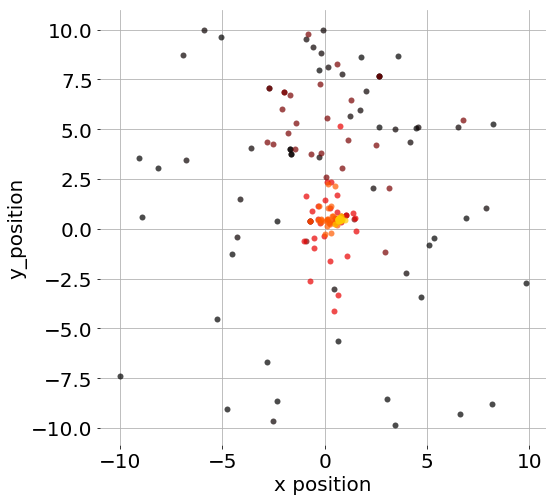

In [53]:
fig, ax = viz_evolution.plot_optimization_evolution_2d(evolution_data)

# Objective function plotter

In [58]:
obj_values = debug_loader.parse_lines_with_start(DATA_PATH, '# AVG FITNESS:')

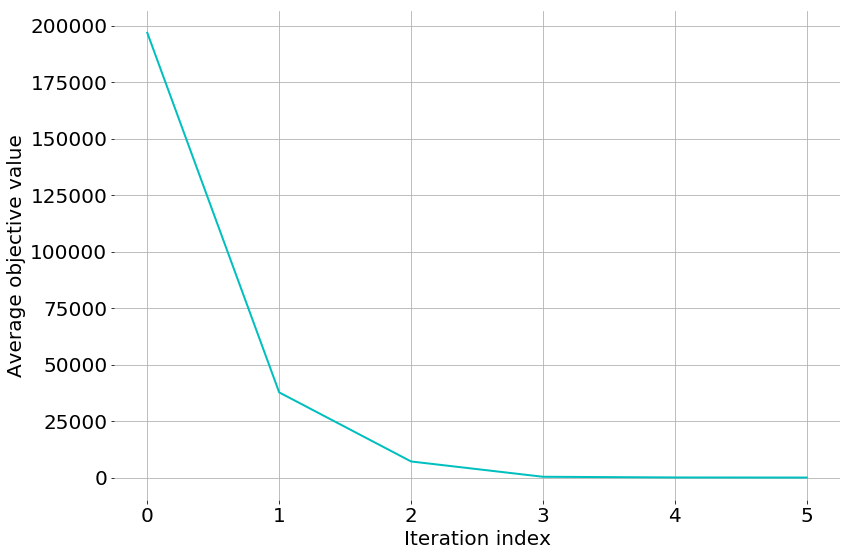

In [59]:
_, _ = viz_evolution.plot_objective_value_evolution(obj_values)